###### The RK4 method
This codes uses the RK4 method to integrate the EoM for the classical harmonic oscilator with mass $m=1$
and frequency squared ($\omega^2$) denoted by om2.

This code makes extensive use of numpy arrays (extension of python lists).

Tested with python 3.6


First import the important libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
#make sure all the plots appear inline
%matplotlib inline

In [3]:
# Defines physical constants
hbar=1.055*10**(-34)
c=299792458
pi=np.math.pi
M0=1.989*10**(30)
G=6.674*10**(-11)
R0=G*M0/c**2 /1000
# Atomic number of nucleus comprising the star
Z=26
# Mass number of nucleus comprising the star
A=56
m_N=1.661*10**(-27)
m_e=9.109*10**(-31)

In [4]:
#function to calculate derivatives for h.osc.
#y[0]=P
#y[1]=M
def deriv(y,t,alpha,beta,gamma):
    return np.array([-alpha*y[0]**(1/gamma)*y[1]/t**2, beta*t**2*y[0]**(1/gamma)])

In [5]:
#rk4 does a single RK4 step
def rk4(y,dy,t,h,a,b,c):
    k1=dy(y,t,a,b,c)
    k2=dy(y+h/2*k1,t+h/2,a,b,c)
    k3=dy(y+h/2*k2,t+h/2,a,b,c)
    k4=dy(y+h*k3,t+h,a,b,c)
    y=y+h*(k1+2*k2+2*k3+k4)/6
    t=t+h
    return (t,y)

In [6]:
def solveEOS(P,alpha,gamma):
    # Solves equation of states for given value of initial pressure [P], [alpha] value and for [gamma]. 
    # [gamma] values of only 4/3 and 5/3 are allowed, relativistic and non-relativistic respectively.
    # Beta value is calculated for given alpha.
    # Appropriate K(Rel or Non-Rel) is choosed based on the choice of gamma.
    # Returns the radius [R] and the mass [M] of the star, 
    # Also returns the pressure and the mass of the star as a function of radius, [Ps] and [Ms] in nympy array in [ys].
    
    y=np.array([P,0])  # starting value for P and M
    r=0.000001                  # starting radius. Didn't choose 0 because there would be division by 0.
    h=1               # step size
    rmax=400000              # set max radius to avoid integrating until the end of time
    rs=np.array([r])     # to store all radius
    ys=np.array([y])     # and all solution points

    # Set beta and gamma    
    if gamma==5/3:
        K = hbar**2 / (15*pi**2*m_e) * (3*pi**2*Z / (A*m_N*c**2))**(5/3) # for non-relativistic case
        #print('Non-Rel!')
    elif gamma==4/3:
        K = hbar*c/(12*pi**2) * (3*pi**2*Z / (A*m_N*c**2))**(4/3)
        #print("Rel!")
    
    epsil0 = (1/K * (R0/alpha)**gamma)**(1/(gamma-1))
    beta = 4*pi*epsil0 / (M0*c**2*(K*epsil0**(gamma-1))**(1/gamma)) *10**9

    #print(beta)


    for i in range(int(rmax/h)):  # take enough steps (or so)
        (r,y)=rk4(y,deriv,r,h,alpha,beta,gamma)
        if math.isnan(y[0]):
            R=r
            break
        rs=np.append(rs,r)
        ys=np.concatenate((ys,np.array([y])))    
        M=y[1]
        
    return (R,M,ys,rs)

# Choosing alpha

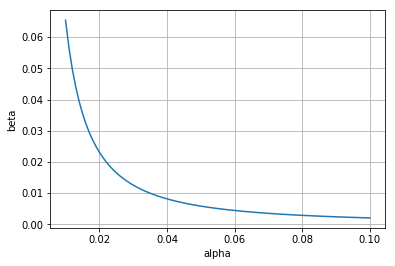

In [7]:
# Make a plot of alpha vs beta. We use this plot to choose the optimal scaling, ie when alpha ~ beta and are close to 1.
gamma=5/3     # 4/3 if relativistc, 5/3 if non-relativistc
alphat=np.arange(0.01,0.1,0.001)
#alphat=0.05
if gamma==5/3:
    K = hbar**2 / (15*pi**2*m_e) * (3*pi**2*Z / (A*m_N*c**2))**(5/3) # for non-relativistic case
elif gamma==4/3:
    K = hbar*c/(12*pi**2) * (3*pi**2*Z / (A*m_N*c**2))**(4/3)
epsil0 = (1/K * (R0/alphat)**gamma)**(1/(gamma-1))
betat = 4*pi*epsil0 / (M0*c**2*(K*epsil0**(gamma-1))**(1/gamma)) *10**9

#print(R0)
#print(epsil0)
#print(betat)
plt.figure()
plt.plot(alphat,betat)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.grid()

# Run the RK4
 

In [8]:
# Call the function to perform the numerical calculation of the equation of state
P=10**(-14)     # the choice of the initial pressure
alpha=1.437     # the choice of alpha for the scaling
gamma=4/3     # 4/3 for relativistic case, 5/3 for non-relativistic case

(R,M,ys,rs)=solveEOS(P,alpha,gamma) # returns radius M, mass M. Also returns the pressure and mass in array ys, and radius rs.

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


# Plot the result

Text(0, 0.5, 'Mass')

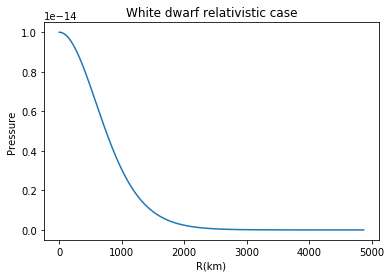

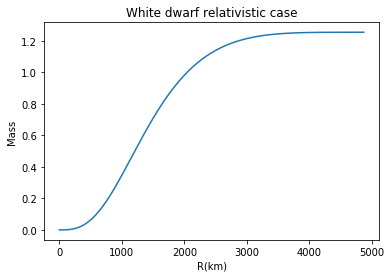

In [9]:
[Ps,Ms]=ys.transpose()

# Scale the radius back
#rs=rs*R0/alpha
#R=R*R0/alpha


plt.figure()
plt.title('White dwarf relativistic case')
plt.plot(rs, Ps)
plt.xlabel('R(km)')
plt.ylabel('Pressure')

plt.figure()
plt.title('White dwarf relativistic case')
plt.plot(rs, Ms)
plt.xlabel('R(km)')
plt.ylabel('Mass')


#fig1, ax1 = plt.subplots(1, 1)
#ax1.plot(rs, P, label='Pressure')
#ax1.plot(rs, M, label='Mass')
#ax1.legend(loc='upper center', shadow=True, fontsize='large')
#ax1.set_xlabel("R (km)",fontsize='large')
#plt.show()


In [10]:
alpha=3.75     # the choice of alpha for the scaling
gamma=4/3

Ps=[10**(-13),10**(-14),10**(-15),10**(-16)]

f=open('output.txt','w')
f.write('{0:>15} | {1:>15} | {2:>15}\n'.format('Cetral pressure','Radius(km)','Mass(Solar mass)'))

for P in Ps:
    (R,M,ys,rs)=solveEOS(P,alpha,gamma)
    #R=R*(R0/alpha)
    f.write('{0:15e} | {1:15f} | {2:15f}\n'.format(P,R,M))
    
f.close()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
